In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
%matplotlib inline

plt.figure(figsize=(10,5))


data = pd.read_csv("train.csv")

<Figure size 720x360 with 0 Axes>

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [195]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [196]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [239]:
data["User_ID"].nunique()

# уникальных покупателей

5891

In [240]:
data["Product_ID"].nunique()

# уникальных продуктов

3631

<AxesSubplot:xlabel='Gender', ylabel='count'>

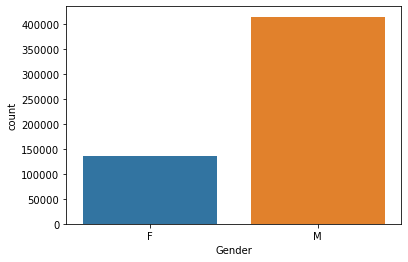

In [197]:
sns.countplot(data.Gender)

# подсчет по полу

<AxesSubplot:>

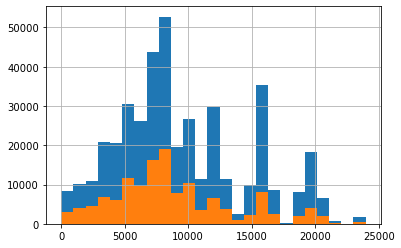

In [198]:
data[data.Gender == "M"]["Purchase"].hist(bins=25)
data[data.Gender == "F"]["Purchase"].hist(bins=25)

#соотношение трат в зависимости от пола, синий - мужчины, оранжевый - женщины

<AxesSubplot:xlabel='Age', ylabel='count'>

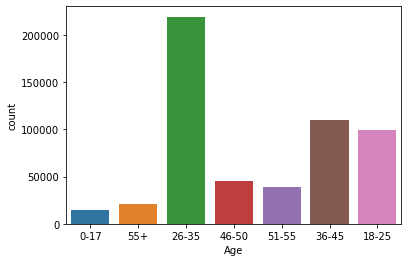

In [199]:
sns.countplot(data.Age)

#подсчет по возрасту

<AxesSubplot:>

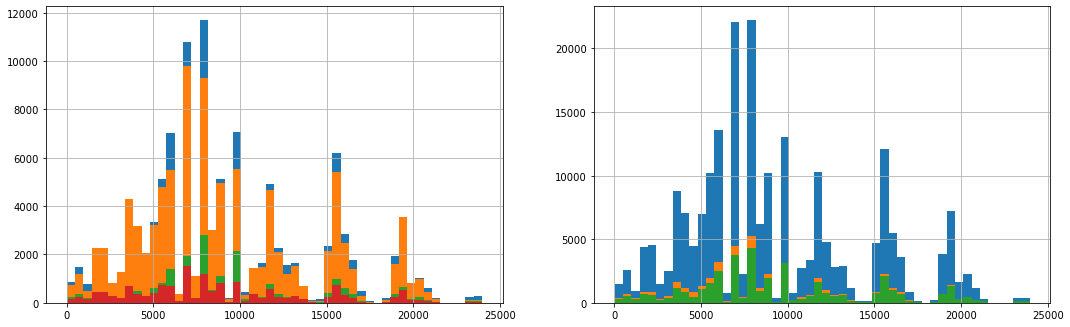

In [200]:
plt.subplot(2,2,1)
data[data.Age == "36-45"]["Purchase"].hist(bins=50, figsize=(18,12))
data[data.Age == "18-25"]["Purchase"].hist(bins=50)
data[data.Age == "55+"]["Purchase"].hist(bins=50)
data[data.Age == "0-17"]["Purchase"].hist(bins=50)


plt.subplot(2,2,2)
data[data.Age == "26-35"]["Purchase"].hist(bins=50)
data[data.Age == "46-50"]["Purchase"].hist(bins=50)
data[data.Age == "51-55"]["Purchase"].hist(bins=50)

# траты по возрасту
# график 1: синий - 36-45 лет, оранжевый - 18-25 лет, зеленый - 55+, красный - 0-17 лет; 
# график 2: синий - 26-35 лет, оранжевый - 46-50 лет, зеленый - 51-55 лет; 
# разбила и поставила не по порядку из-за наложения графиков

<AxesSubplot:xlabel='Occupation', ylabel='count'>

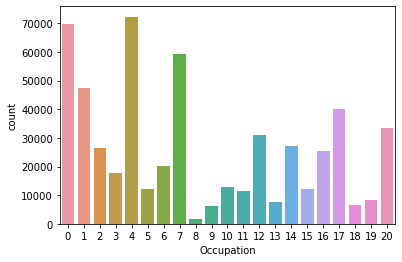

In [201]:
sns.countplot(data.Occupation)

# подсчет трат по профессиям графически

In [241]:
Occupation = list(range(0, 20))
spent_money = []
for oid in Occupation:
    spent_money.append(data[data["Occupation"] == oid]["Purchase"].sum())

spent_money

# сколько было потрачено представителями каждой профессии в цифровом значении

[635406958,
 424614144,
 238028583,
 162002168,
 666244484,
 113649759,
 188416784,
 557371587,
 14737388,
 54340046,
 115844465,
 106751618,
 305449446,
 71919481,
 259454692,
 118960211,
 238346955,
 393281453,
 60721461,
 73700617]

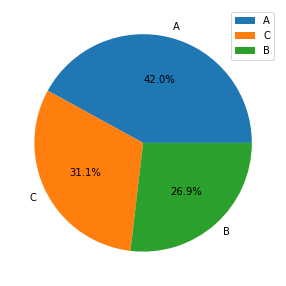

In [243]:
explode = (0, 0, 0)
fig1, ax1 = plt.subplots(figsize=(10,5))
ax1.pie(data["City_Category"].value_counts(), explode=explode, labels=data['City_Category'].unique(), autopct='%1.1f%%')
plt.legend()
plt.show()

# распределение покупателей по городам

<AxesSubplot:xlabel='City_Category', ylabel='count'>

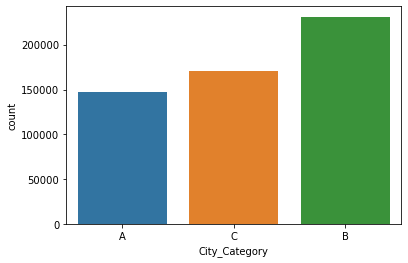

In [202]:
sns.countplot(data.City_Category)

# подсчет трат по городам

<AxesSubplot:>

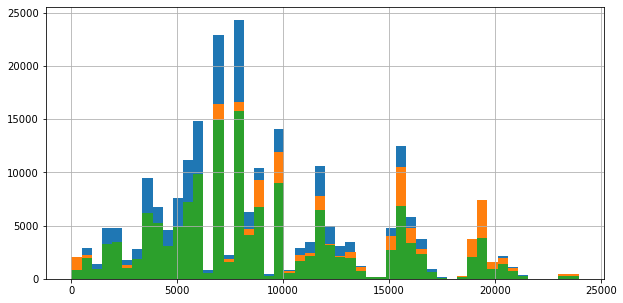

In [203]:
plt.figure(figsize=(10,5))
data[data.City_Category == "B"]["Purchase"].hist(bins=50)
data[data.City_Category == "C"]["Purchase"].hist(bins=50)
data[data.City_Category == "A"]["Purchase"].hist(bins=50)

# подсчитали трат людей в разных городах, B - синий, C - оранжевый, A - зеленый - порядок изменен для лучшего отображения

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

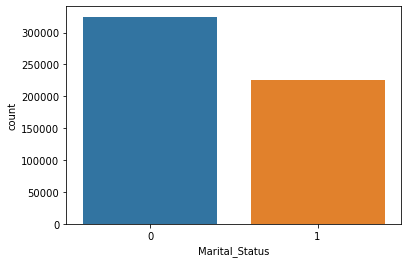

In [204]:
sns.countplot(data.Marital_Status)

# синий-не состоит в браке, оранжевый - состоит

<AxesSubplot:>

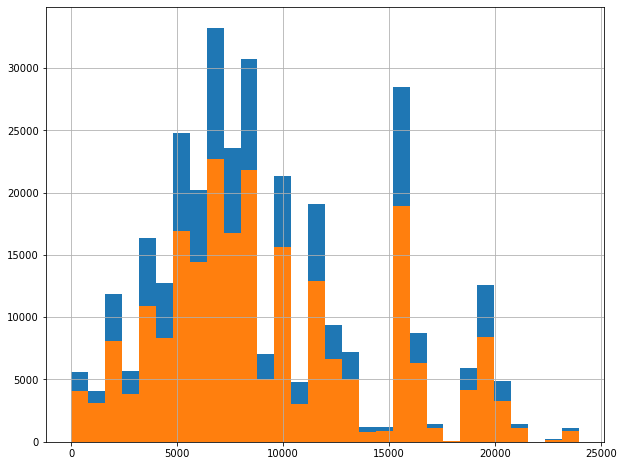

In [205]:
plt.figure(figsize=(10,8))
data[data.Marital_Status == 0]["Purchase"].hist(bins=30)
data[data.Marital_Status == 1]["Purchase"].hist(bins=30)

# траты тех кто в браке и нет

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

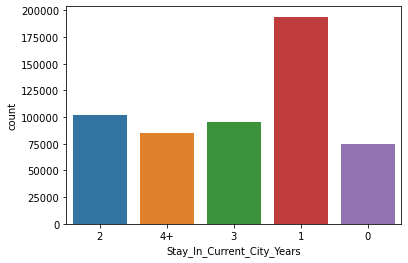

In [206]:
sns.countplot(data.Stay_In_Current_City_Years)

# подсчет людей по сроку проживания в городе

<AxesSubplot:>

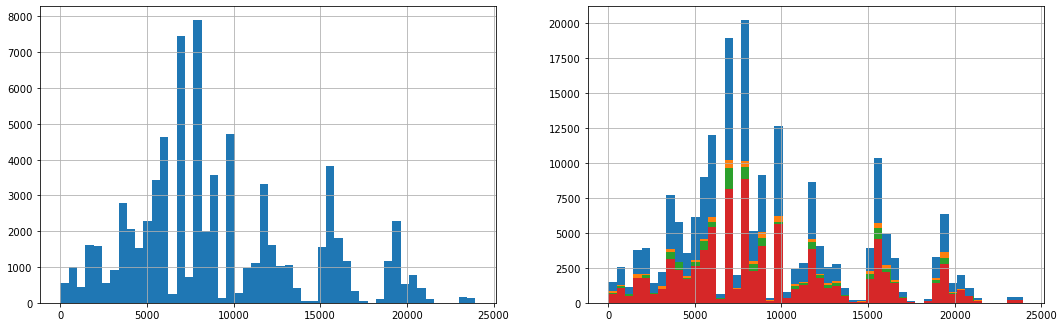

In [212]:
plt.subplot(2,2,1)
data[data.Stay_In_Current_City_Years == '0']['Purchase'].hist(bins=50,figsize=(18,12))

plt.subplot(2,2,2)
data[data.Stay_In_Current_City_Years == '1']['Purchase'].hist(bins=50)
data[data.Stay_In_Current_City_Years == '2']['Purchase'].hist(bins=50)
data[data.Stay_In_Current_City_Years == '3']['Purchase'].hist(bins=50)
data[data.Stay_In_Current_City_Years == '4+']['Purchase'].hist(bins=50)

# график 1: синий - 0 лет, график 2: синий - 1 год, оранжевый - 2 года, зеленый - 3 года, 
# красный - 4+ лет; разбила из-за наложения графиков

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

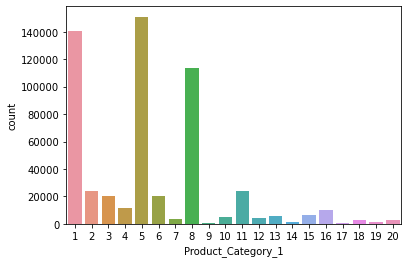

In [208]:
sns.countplot(data.Product_Category_1)

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

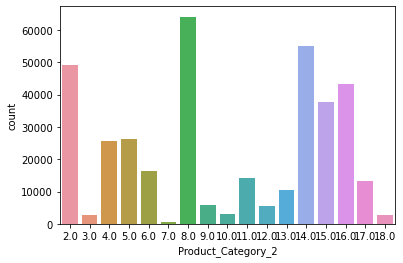

In [209]:
sns.countplot(data.Product_Category_2)

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

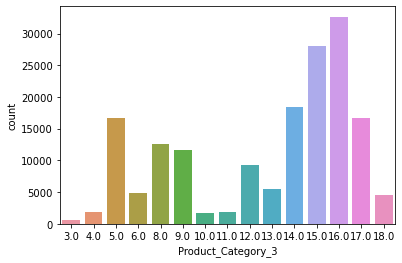

In [210]:
sns.countplot(data.Product_Category_3)

<AxesSubplot:xlabel='Gender', ylabel='count'>

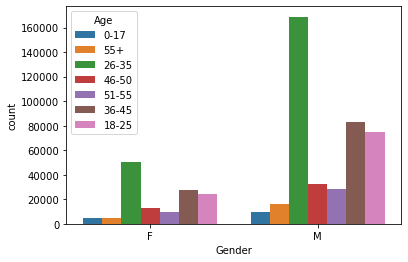

In [211]:
sns.countplot(data=data, x=data.Gender, hue=data.Age)


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

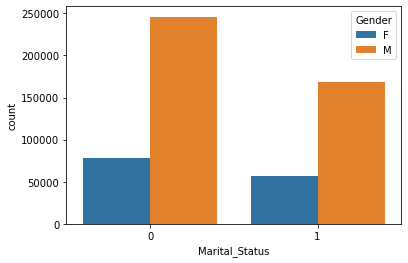

In [213]:
sns.countplot(data=data, x=data.Marital_Status, hue=data.Gender)

array([[<AxesSubplot:title={'center':'0-17'}>,
        <AxesSubplot:title={'center':'18-25'}>,
        <AxesSubplot:title={'center':'26-35'}>],
       [<AxesSubplot:title={'center':'36-45'}>,
        <AxesSubplot:title={'center':'46-50'}>,
        <AxesSubplot:title={'center':'51-55'}>],
       [<AxesSubplot:title={'center':'55+'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

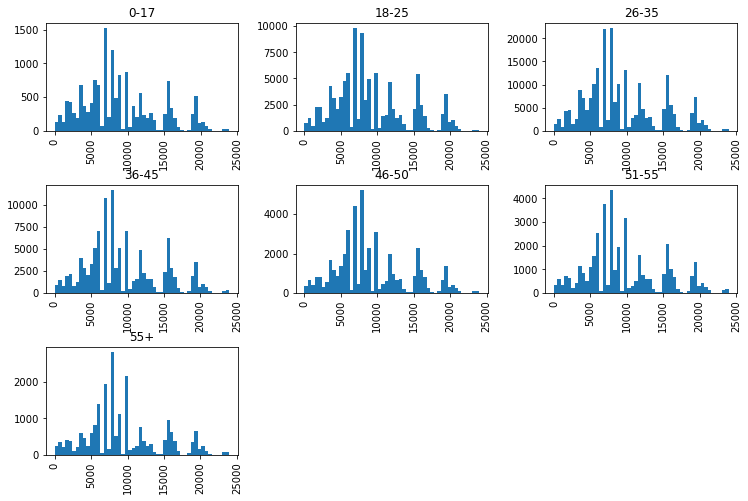

In [214]:
data.Purchase.hist(bins=50, figsize=(12,8), by=data.Age)

array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

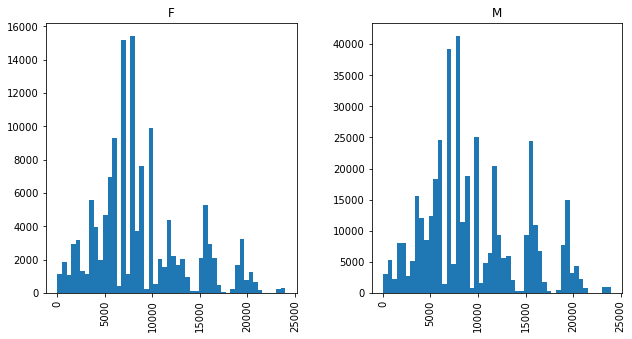

In [217]:
data.Purchase.hist(bins=50, figsize=(10,5), by=data.Gender)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>],
       [<AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>],
       [<AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>],
       [<AxesSubplot:title={'center':'20'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>, <Axes

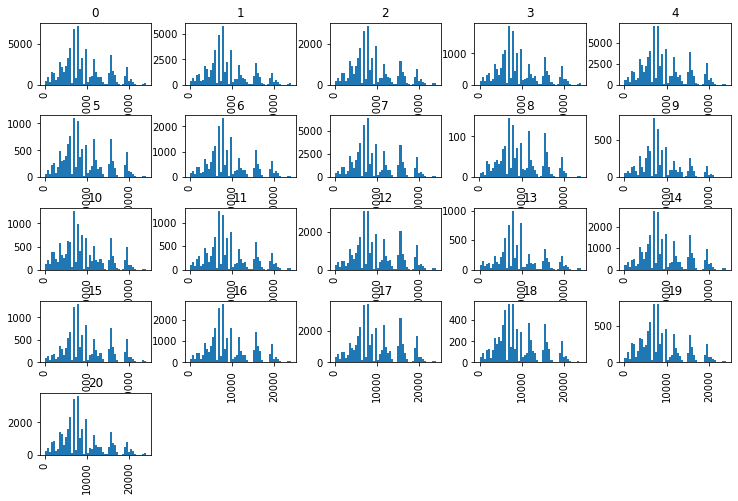

In [218]:
data.Purchase.hist(bins=50, figsize=(12,8), by=data.Occupation)

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>, <AxesSubplot:>]], dtype=object)

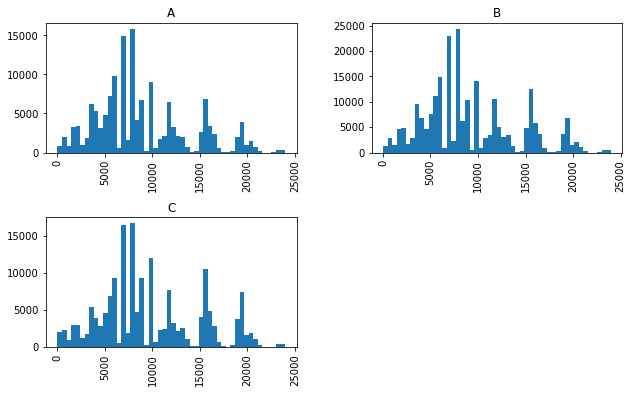

In [221]:
data.Purchase.hist(bins=50, figsize=(10,6), by=data.City_Category)

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>],
       [<AxesSubplot:title={'center':'4+'}>, <AxesSubplot:>]],
      dtype=object)

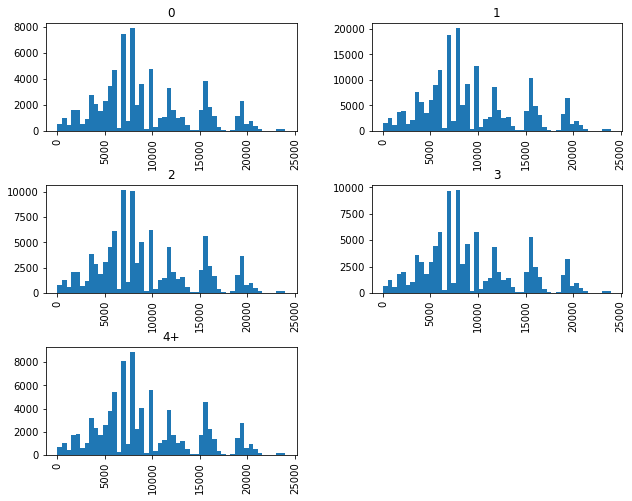

In [226]:
data.Purchase.hist(bins=50, figsize=(10,8), by=data.Stay_In_Current_City_Years)

In [228]:
data.Product_Category_1.isnull().sum()

# проверка чисто для себя, хотя итак видно, что все данные есть

0

In [232]:
data.Product_Category_1.value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

<AxesSubplot:xlabel='Product_Category_1', ylabel='Age'>

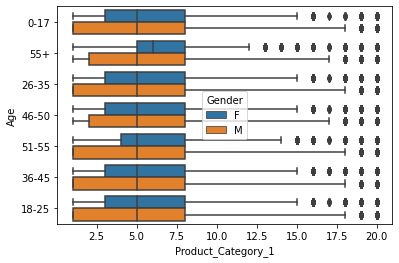

In [236]:
sns.boxplot(x=data.Product_Category_1, y=data.Age, hue=data.Gender)

In [230]:
data.Product_Category_2.isnull().sum()

173638

In [233]:
data.Product_Category_2.value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

<AxesSubplot:xlabel='Product_Category_2', ylabel='Age'>

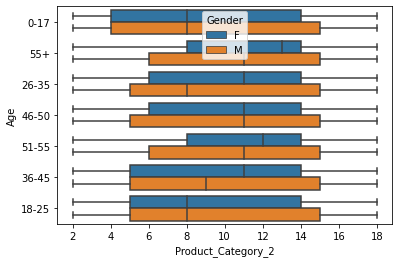

In [237]:
sns.boxplot(x=data.Product_Category_2, y=data.Age, hue=data.Gender)

In [231]:
data.Product_Category_3.isnull().sum()

383247

In [234]:
data.Product_Category_3.value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

<AxesSubplot:xlabel='Product_Category_3', ylabel='Age'>

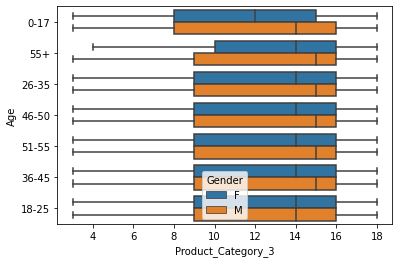

In [238]:
sns.boxplot(x=data.Product_Category_3, y=data.Age, hue=data.Gender)

In [244]:
data["Product_Category_2"].fillna((data["Product_Category_2"].mean()), inplace=True)

# дополним недостающие данные из категории 2, категория 1 заполнена целиком

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 42.0+ MB


In [337]:
data = data.drop(["Product_Category_3"], axis=1)

# категорию 3 исключим из анализа, в связи с малым объемом данных

KeyError: "['Product_Category_3'] not found in axis"

In [331]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 42.0+ MB


In [338]:
data = data.drop(["User_ID"], axis=1)

# уберу лишнюю информацию

KeyError: "['User_ID'] not found in axis"

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 42.0+ MB


In [440]:
df_Gender = pd.get_dummies(data["Gender"])

df_Age = pd.get_dummies(data["Age"])

df_City_Category = pd.get_dummies(data["City_Category"])

df_Stay_In_Current_City_Years = pd.get_dummies(data["Stay_In_Current_City_Years"])

data_final = pd.concat([data, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

# кодируем векторы

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,...,51-55,55+,A,B,C,0,1,2,3,4+
0,P00069042,F,0-17,10,A,2,0,3,9.842329,8370,...,0,0,1,0,0,0,0,1,0,0
1,P00248942,F,0-17,10,A,2,0,1,6.000000,15200,...,0,0,1,0,0,0,0,1,0,0
2,P00087842,F,0-17,10,A,2,0,12,9.842329,1422,...,0,0,1,0,0,0,0,1,0,0
3,P00085442,F,0-17,10,A,2,0,12,14.000000,1057,...,0,0,1,0,0,0,0,1,0,0
4,P00285442,M,55+,16,C,4+,0,8,9.842329,7969,...,0,1,0,0,1,0,0,0,0,1


In [441]:
X = data_final[["Occupation", "Marital_Status", "Product_Category_2", "F", "M", "0-17", "18-25", "26-35", "36-45", 
                "46-50", "51-55", "55+", "A", "B", "C", "0", "1", "2", "3", "4+"]]

y = data_final["Purchase"]

# векторы модели созданы

In [442]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# разбив данных на обучающий и тестовый набор - по 50%

In [443]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# импортируем модель линейной регрессии и обучаем ее

LinearRegression()

In [444]:
print("Intercept parameter:", lm.intercept_)
      
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

print(coef_df)

# выводим значения коээфициентов и параметра перехвата

Intercept parameter: 11073.920771405752
                    Coefficient
Occupation             8.815641
Marital_Status       -40.233993
Product_Category_2  -212.984820
F                   -331.131781
M                    331.131781
0-17                -472.494616
18-25                -57.260703
26-35                 80.617537
36-45                104.895169
46-50                 38.963358
51-55                283.673479
55+                   21.605776
A                   -326.363377
B                   -118.276713
C                    444.640090
0                    -75.893732
1                      3.835204
2                     48.978672
3                     22.819615
4+                     0.260241


In [446]:
predictions = lm.predict(X_test)

print("Предполагаемые траты для новых покупателей:", np.around(predictions, decimals=1))

Предполагаемые траты для новых покупателей: [7774.7 7669.7 7892.6 ... 9765.4 9176.9 7627.3]


In [325]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))

# определяем среднюю абсолютную (MAE) и среднюю квадратическую (MSE) ошибку 

MAE: 3892.227086165101
MSE: 24150053.03761331


In [326]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [327]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [328]:
print("Intercept parameter:", lm.intercept_)
      
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])

print(coef_df)

Intercept parameter: 11105.852434765522
                    Coefficient
Occupation             8.116270
Marital_Status       -68.617076
Product_Category_2  -213.159759
F                   -319.981914
M                    319.981914
0-17                -483.395502
18-25                -79.163850
26-35                 70.907452
36-45                120.811085
46-50                 19.207823
51-55                339.013135
55+                   12.619858
A                   -338.249984
B                   -117.835894
C                    456.085878
0                    -44.193217
1                     -4.598932
2                     46.896256
3                     15.227046
4+                   -13.331152


In [447]:
predictions = lm.predict(X_test)

print("Предполагаемые траты для новых покупателей:", np.around(predictions, decimals=1))

Предполагаемые траты для новых покупателей: [7774.7 7669.7 7892.6 ... 9765.4 9176.9 7627.3]


In [448]:
from sklearn import metrics

print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print("MSE:", metrics.mean_squared_error(y_test, predictions))

# определяем среднюю абсолютную (MAE) и среднюю квадратическую (MSE) ошибку
# попробовала разное количество данных, но в ошибке разницу увидела не слишком большую

MAE: 3895.782828995767
MSE: 24209446.023596406
